In [51]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import numpy as np
import sys    
import pubchempy as pcp
import warnings
warnings.filterwarnings('ignore')
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')
from sklearn.utils import shuffle
import sys
sys.path.insert(0,"./../fip3")
from fip.profiles import CooccurrenceProfile
from fip import profiles
import re
from itertools import chain
from ast import literal_eval

In [2]:
#Loading zinc database from csv 
suppl_coco = pd.read_csv('../data/COCOECFP.csv', delimiter = ' ')
suppl_coco

,Coconut_id,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CNP0000002,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,FJEMIESGEMWDOB-UHFFFAOYSA-N,FJEMIESGEMWDOB,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[39, 58, 80, 118, 140, 144, 147, 209, 229, 252..."
1,CNP0000003,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,KLWKJVYCDFWQMK-UHFFFAOYSA-N,KLWKJVYCDFWQMK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 94, 249, 314, 467, 495, 497, 569, 587, 64..."
2,CNP0000004,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,PTEKHLCNKCAXPH-UHFFFAOYSA-N,PTEKHLCNKCAXPH,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 467, 497, 569, 587, 6..."
3,CNP0000005,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,ZVAVQCZAGOKAMX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 70, 80, 114, 145, 147, 207, 270, 302, 341..."
4,CNP0000006,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,UYIPOCQHTAYRMA-UHFFFAOYSA-N,UYIPOCQHTAYRMA,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 410, 457, 467, 497, 5..."
...,...,...,...,...,...,...,...,...,...
386292,CNP0436851,COc1cccc2ccc(C(C)=O)c(O)c12,216.078644,2.75660,XNWOWNYWQOTWIX-UHFFFAOYSA-N,XNWOWNYWQOTWIX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[67, 202, 203, 230, 249, 650, 695, 725, 806, 8..."
386293,CNP0436852,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,570.188983,4.77902,XWGVAZYMLDVIDS-UHFFFAOYSA-N,XWGVAZYMLDVIDS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 67, 84, 142, 148, 202, 206, 231, 249, 253,..."
386294,CNP0436853,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,420.157288,4.82510,XZXMEYSQXQNHCX-UHFFFAOYSA-N,XZXMEYSQXQNHCX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 6, 53, 56, 84, 212, 276, 294, 314, 398, 43..."
386295,CNP0436854,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,1183.685261,-1.20930,YNLIJTVZSFUHKP-UHFFFAOYSA-N,YNLIJTVZSFUHKP,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 5, 19, 42, 80, 109, 115, 130, 222, 231, 23..."


In [3]:
suppl_coco  = suppl_coco [['Bitset']]
suppl_coco

,Bitset
0,"[39, 58, 80, 118, 140, 144, 147, 209, 229, 252..."
1,"[77, 94, 249, 314, 467, 495, 497, 569, 587, 64..."
2,"[77, 249, 298, 314, 352, 467, 497, 569, 587, 6..."
3,"[13, 70, 80, 114, 145, 147, 207, 270, 302, 341..."
4,"[77, 249, 298, 314, 352, 410, 457, 467, 497, 5..."
...,...
386292,"[67, 202, 203, 230, 249, 650, 695, 725, 806, 8..."
386293,"[5, 67, 84, 142, 148, 202, 206, 231, 249, 253,..."
386294,"[1, 6, 53, 56, 84, 212, 276, 294, 314, 398, 43..."
386295,"[1, 5, 19, 42, 80, 109, 115, 130, 222, 231, 23..."


In [4]:
for x in suppl_coco.index:
    a = suppl_coco['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    suppl_coco['Bitset'][x] = a

In [5]:
feature_list = []
for x in suppl_coco['Bitset']:
    tup = literal_eval(x)
    feature_list.append(tup)
feature_list[:3]

[('39',
  '58',
  '80',
  '118',
  '140',
  '144',
  '147',
  '209',
  '229',
  '252',
  '266',
  '314',
  '389',
  '456',
  '497',
  '550',
  '552',
  '595',
  '601',
  '610',
  '650',
  '656',
  '687',
  '694',
  '695',
  '722',
  '725',
  '751',
  '798',
  '807',
  '841',
  '844',
  '846',
  '926',
  '937',
  '940',
  '956',
  '972',
  '1017',
  '1019',
  '1035',
  '1057',
  '1060',
  '1099',
  '1103',
  '1126',
  '1136',
  '1139',
  '1154',
  '1171',
  '1177',
  '1182',
  '1187',
  '1224',
  '1257',
  '1292',
  '1296',
  '1309',
  '1380',
  '1381',
  '1392',
  '1409',
  '1457',
  '1487',
  '1509',
  '1604',
  '1609',
  '1622',
  '1750',
  '1763',
  '1769',
  '1815',
  '1817',
  '1859',
  '1898',
  '1917',
  '1921',
  '1950',
  '1958',
  '1988',
  '2029'),
 ('77',
  '94',
  '249',
  '314',
  '467',
  '495',
  '497',
  '569',
  '587',
  '642',
  '650',
  '656',
  '695',
  '750',
  '751',
  '807',
  '841',
  '875',
  '914',
  '926',
  '940',
  '1019',
  '1027',
  '1038',
  '1050',
  '

In [6]:
feature_list[-1]

('1',
 '5',
 '19',
 '42',
 '65',
 '80',
 '115',
 '140',
 '219',
 '222',
 '227',
 '231',
 '253',
 '280',
 '283',
 '294',
 '301',
 '314',
 '334',
 '335',
 '362',
 '378',
 '389',
 '401',
 '435',
 '458',
 '467',
 '473',
 '480',
 '545',
 '552',
 '590',
 '591',
 '650',
 '684',
 '687',
 '717',
 '732',
 '739',
 '794',
 '807',
 '808',
 '820',
 '832',
 '878',
 '926',
 '927',
 '935',
 '957',
 '979',
 '1019',
 '1034',
 '1057',
 '1066',
 '1088',
 '1089',
 '1114',
 '1143',
 '1145',
 '1150',
 '1171',
 '1199',
 '1212',
 '1217',
 '1229',
 '1240',
 '1243',
 '1257',
 '1289',
 '1292',
 '1312',
 '1322',
 '1345',
 '1373',
 '1380',
 '1433',
 '1444',
 '1456',
 '1462',
 '1506',
 '1516',
 '1520',
 '1543',
 '1544',
 '1545',
 '1564',
 '1575',
 '1580',
 '1587',
 '1620',
 '1636',
 '1640',
 '1657',
 '1689',
 '1693',
 '1718',
 '1733',
 '1739',
 '1750',
 '1754',
 '1772',
 '1773',
 '1783',
 '1791',
 '1831',
 '1838',
 '1847',
 '1873',
 '1876',
 '1891',
 '1898',
 '1911',
 '1917',
 '1932',
 '1960',
 '2001')

In [7]:
p = CooccurrenceProfile.from_feature_lists(feature_list)
p.df

value
feature1 feature2       
1017     1017      87619
         1019      67820
         1035      33584
         1057      86960
         1060      53593
...                  ...
1100     748           1
1054     512           1
1246     505           1
135      1757          1
1705     1789          2

[2096060 rows x 1 columns]

In [8]:
p.df.to_csv('../data/CooccurenceProfile/COCO/COCOp.csv')
pd.read_csv('../data/CooccurenceProfile/COCO/COCOp.csv',index_col=[0,1])

value
feature1 feature2       
1017     1017      87619
         1019      67820
         1035      33584
         1057      86960
         1060      53593
...                  ...
1100     748           1
1054     512           1
1246     505           1
135      1757          1
1705     1789          2

[2096060 rows x 1 columns]

In [27]:
p.df

value
feature1 feature2          
1017     1017      0.226818
         1019      0.175564
         1035      0.086938
         1057      0.225112
         1060      0.138735
...                     ...
1100     748       0.000003
1054     512       0.000003
1246     505       0.000003
135      1757      0.000003
1705     1789      0.000005

[2096060 rows x 1 columns]

In [13]:
p.to_csv('../data/CooccurenceProfile/COCO/COCO1p.csv')
pd.read_csv('../data/CooccurenceProfile/COCO/COCO1p.csv',index_col=[0,1])

value
feature1 feature2          
1017     1017      0.226818
         1019      0.175564
         1035      0.086938
         1057      0.225112
         1060      0.138735
...                     ...
1100     748       0.000003
1054     512       0.000003
1246     505       0.000003
135      1757      0.000003
1705     1789      0.000005

[2096060 rows x 1 columns]

In [21]:
p0 = pd.read_csv('../data/CooccurenceProfile/COCO/COCO1p.csv',index_col=[0,1])
p0

value
feature1 feature2          
1017     1017      0.226818
         1019      0.175564
         1035      0.086938
         1057      0.225112
         1060      0.138735
...                     ...
1100     748       0.000003
1054     512       0.000003
1246     505       0.000003
135      1757      0.000003
1705     1789      0.000005

[2096060 rows x 1 columns]

In [ ]:
zinc0 = pd.read_csv('../data/CooccurenceProfile/ZINCp0.csv',index_col=[0,1])
zinc0

In [11]:
r.df

value
feature1 feature2          
1017     1017      0.000000
         1019      0.225816
         1035      1.744645
         1057      0.199338
         1060      0.577003
...                     ...
1100     748      -3.517223
1054     512      -3.528867
1246     505      -4.324881
135      1757     -3.302346
1705     1789     -3.401414

[2096060 rows x 1 columns]

In [12]:
r.to_csv('../data/CooccurenceProfile/COCO/COCOr.csv')
pd.read_csv('../data/CooccurenceProfile/COCO/COCOr.csv',index_col=[0,1])

value
feature1 feature2          
1017     1017      0.000000
         1019      0.225816
         1035      1.744645
         1057      0.199338
         1060      0.577003
...                     ...
1100     748      -3.517223
1054     512      -3.528867
1246     505      -4.324881
135      1757     -3.302346
1705     1789     -3.401414

[2096060 rows x 1 columns]

In [24]:
print(f"There are {len(p.distinct_features())} distinct within COCONUT.")

There are 2048 distinct within COCONUT.


In [64]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CooccurenceProfile/COCO/COCOp.csv'))
p.df

value
feature1 feature2       
1017     1017      87619
         1019      67820
         1035      33584
         1057      86960
         1060      53593
...                  ...
1100     748           1
1054     512           1
1246     505           1
135      1757          1
1705     1789          2

[2096060 rows x 1 columns]

In [65]:
q = CooccurrenceProbabilityProfile.from_cooccurrence_profile(p)
q

In [66]:
from fip.profiles import PointwiseMutualInformationProfile
r = PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(q)
r

KeyError: 1017

In [ ]:
pd.read_csv('../data/CooccurenceProfile/COCO/COCOr.csv',index_col=[0,1])

In [30]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1  feature2
1017      1017         87619
1019      1019        255684
1035      1035         44184
1057      1057        333915
1060      1060        158393
                       ...  
131       131           4494
1161      1161          2667
1787      1787          1304
1643      1643          2112
181       181           1697
Name: value, Length: 2048, dtype: int64

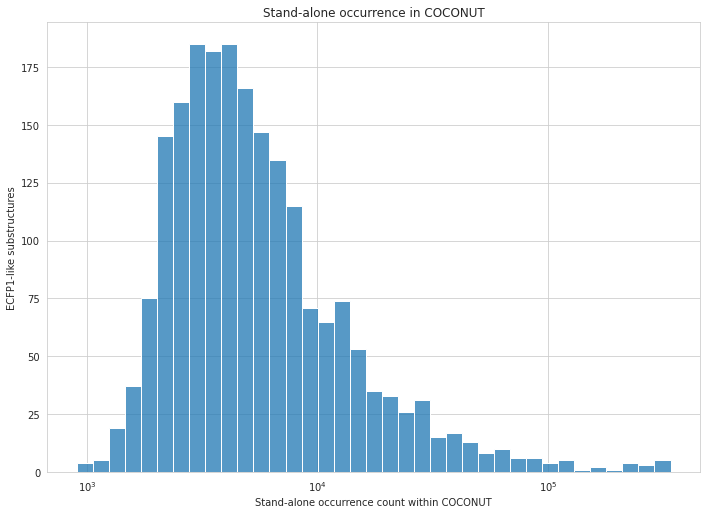

In [31]:
title = f"Stand-alone occurrence in COCONUT"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within COCONUT", ylabel=f"ECFP1-like substructures")
plt.savefig(f"COCONUT1.svg", format="svg")
#plt.close()

In [32]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1  feature2
1017      1019        67820
          1035        33584
          1057        86960
          1060        53593
          1099         1286
                      ...  
1100      748             1
1054      512             1
1246      505             1
135       1757            1
1705      1789            2
Name: value, Length: 2094012, dtype: int64

In [33]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for within COCONUT")

There is in total 21027472 feature stand-alone occurrences and 657482445 feature co-occurrences for within COCONUT


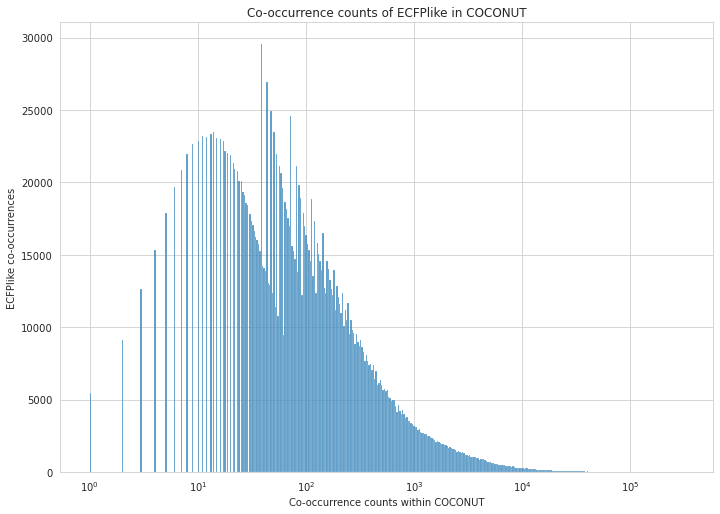

In [36]:
title = f"Co-occurrence counts of ECFPlike in COCONUT"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within COCONUT",
       ylabel=f"ECFPlike co-occurrences")
plt.savefig(f"COCONUT2.svg", format="svg")
#plt.close()

In [38]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p)
p

In [39]:
p.select_self_relations()['value']

feature1  feature2
1017      1017        0.257613
1019      1019        0.751749
1035      1035        0.129907
1057      1057        0.981759
1060      1060        0.465699
                        ...   
131       131         0.013213
1161      1161        0.007841
1787      1787        0.003834
1643      1643        0.006210
181       181         0.004989
Name: value, Length: 2048, dtype: float64

In [40]:
p.select_self_relations()['value'].min()

0.0026608334141873875

In [41]:
p.select_raw_interrelations()['value'].min()

2.9401474189915883e-06

In [42]:
p.df

value
feature1 feature2          
1017     1017      0.257613
         1019      0.199401
         1035      0.098742
         1057      0.255675
         1060      0.157571
...                     ...
1100     748       0.000003
1054     512       0.000003
1246     505       0.000003
135      1757      0.000003
1705     1789      0.000006

[2096060 rows x 1 columns]

In [43]:
r.df

value
feature1 feature2          
1017     1017      0.000000
         1019      0.225816
         1035      1.744645
         1057      0.199338
         1060      0.577003
...                     ...
1100     748      -3.517223
1054     512      -3.528867
1246     505      -4.324881
135      1757     -3.302346
1705     1789     -3.401414

[2096060 rows x 1 columns]

In [44]:
pmi_values = r.select_raw_interrelations()['value']
pmi_values

feature1  feature2
1017      1019        0.225816
          1035        1.744645
          1057        0.199338
          1060        0.577003
          1099       -0.157324
                        ...   
1100      748        -3.517223
1054      512        -3.528867
1246      505        -4.324881
135       1757       -3.302346
1705      1789       -3.401414
Name: value, Length: 2094012, dtype: float64

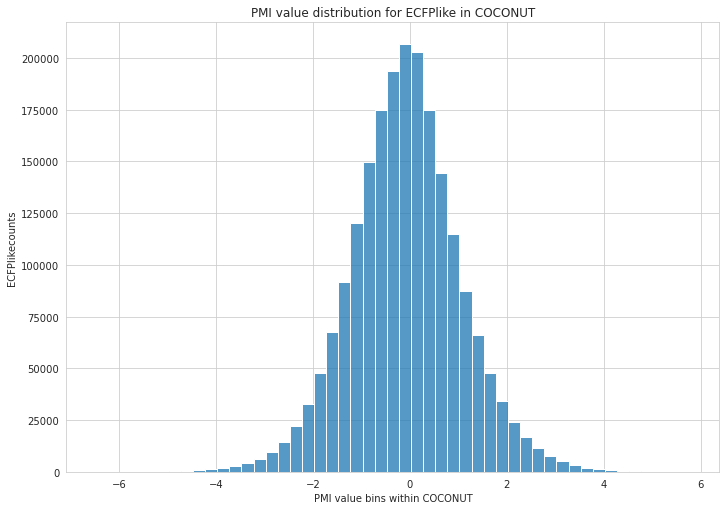

In [45]:
title = f"PMI value distribution for ECFPlike in COCONUT"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within COCONUT", ylabel=f"ECFPlikecounts")
plt.savefig(f"COCONUT3.svg", format="svg")
#plt.close()

In [46]:
print(f"The mean PMI value for ECFPlike within COCONUT \
is {r.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {r.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {r.mean_self_relation_value():.2f}, \
with the standard deviation of {r.standard_self_relation_deviation():.2f}.")

The mean PMI value for ECFPlike within COCONUT is -0.09, with the standard deviation of 1.13. The mean stand-alone value is 0.00, with the standard deviation of 0.00.


In [47]:
major_pmi_values = r.select_major_interrelations(2)['value']
major_pmi_values

feature1  feature2
1035      1177        2.447253
          846         2.808136
1099      1392        2.347436
          1509        2.444624
          1763        3.263660
                        ...   
1100      748        -3.517223
1054      512        -3.528867
1246      505        -4.324881
135       1757       -3.302346
1705      1789       -3.401414
Name: value, Length: 108879, dtype: float64

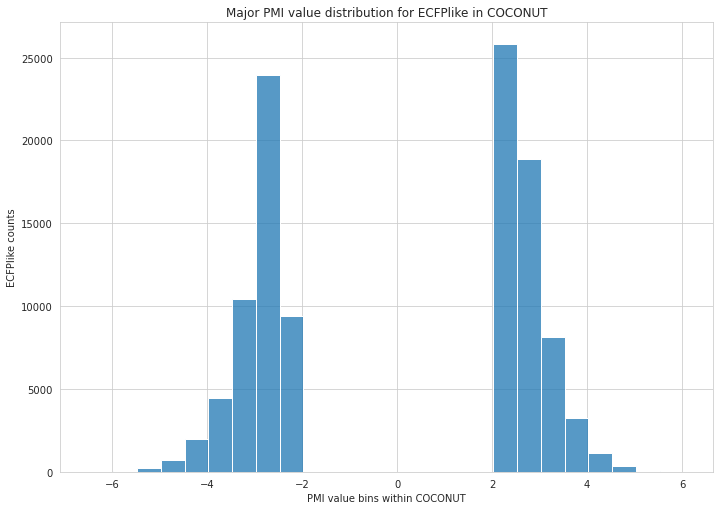

In [48]:
title = f"Major PMI value distribution for ECFPlike in COCONUT"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=title, xlabel=f"PMI value bins within COCONUT", ylabel=f"ECFPlike counts")
plt.savefig(f"COCONUT4.svg", format="svg")
#plt.close()

In [49]:
r.mean_raw_interrelation_value()

-0.09429849103163405

In [59]:
r.df

value
feature1 feature2       
1017     1017          0
         1019          0
         1035          3
         1057          0
         1060          1
...                  ...
1100     748          -7
1054     512          -7
1246     505          -8
135      1757         -6
1705     1789         -6

[2096060 rows x 1 columns]

In [57]:
pA = CooccurrenceProfile.__add__(r, r)

In [58]:
pA.df

value
feature1 feature2       
1017     1017          0
         1019          0
         1035          3
         1057          0
         1060          1
...                  ...
1100     748          -7
1054     512          -7
1246     505          -8
135      1757         -6
1705     1789         -6

[2096060 rows x 1 columns]